Você pode adquirir versões impressas e de e-book do *Think Python 3e* (em inglês) em
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) e
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

Uma versão em língua portuguesa da 3ª edição foi publicada pela editora [Novatec](https://novatec.com.br/livros/pense-em-python-3ed/).

In [ ]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

# Classes e Funções

Neste ponto, você sabe como usar funções para organizar código e como usar tipos internos para organizar dados.
O próximo passo é a **programação orientada a objetos**, que usa tipos definidos pelo programador para organizar código e dados.

A programação orientada a objetos é um grande tópico, então prosseguiremos gradualmente.
Neste capítulo, começaremos com código que não é idiomático — ou seja, não é o tipo de código que programadores experientes escrevem — mas é uma boa maneira de começar.
Nos próximos dois capítulos, usaremos recursos adicionais para escrever código mais idiomático.

## Tipos definidos pelo programador

Usamos muitos dos tipos internos do Python -- agora definiremos um novo tipo.
Como primeiro exemplo, criaremos um tipo chamado `Time` que representa uma hora do dia.
Um tipo definido pelo programador também é chamado de **classe**.
Uma definição de classe é feita assim:

In [ ]:
class Time:
    """Representa uma hora do dia."""

O cabeçalho indica que a nova classe é chamada `Time`.
O corpo é uma docstring que explica para que serve a classe.
Definir uma classe cria um **objeto classe**.

O objeto classe é como uma fábrica para criar objetos.
Para criar um objeto `Time`, você chama `Time` como se fosse uma função:

In [ ]:
lunch = Time()

O resultado é um novo objeto cujo tipo é `__main__.Time`, em que `__main__` é o nome do módulo onde `Time` está definido:

In [ ]:
type(lunch)

__main__.Time

Quando você exibe um objeto, o Python informa qual é o tipo dele e onde ele está armazenado na memória (o prefixo `0x` significa que o número seguinte está em hexadecimal):

In [ ]:
print(lunch)

A criação de um novo objeto é chamada de **instanciação**, e o objeto é uma **instância** da classe.

## Atributos

Um objeto pode conter variáveis, que são chamadas de **atributos**.
Podemos criar atributos usando a notação de ponto:

In [ ]:
lunch.hour = 11
lunch.minute = 59
lunch.second = 1

Este exemplo cria atributos chamados `hour`, `minute` e `second`, que contêm as horas, minutos e segundos do tempo `11:59:01`, que é hora do almoço, no que me diz respeito.

O diagrama a seguir mostra o estado de `lunch` e seus atributos após essas atribuições:

In [ ]:
from diagram import make_frame, make_binding

d1 = dict(hour=11, minute=59, second=1)
frame = make_frame(d1, name='Time', dy=-0.3, offsetx=0.48)
binding = make_binding('lunch', frame)

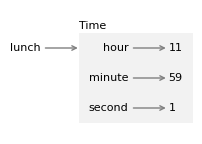

In [ ]:
from diagram import diagram, adjust

width, height, x, y = [1.77, 1.24, 0.25, 0.86]
ax = diagram(width, height)
bbox = binding.draw(ax, x, y)
#adjust(x, y, bbox)

A variável `lunch` se refere a um objeto `Time`, que contém três atributos.
Cada atributo se refere a um inteiro.
Um diagrama de estado como este -- que mostra um objeto e seus atributos -- é chamado de **diagrama de objeto**.

Você pode ler o valor de um atributo usando o operador ponto:

In [ ]:
lunch.hour

11

Você pode usar um atributo como parte de qualquer expressão:

In [ ]:
total_minutes = lunch.hour * 60 + lunch.minute
total_minutes

719

E você pode usar o operador ponto em uma expressão em uma *f-string*:

In [ ]:
f'{lunch.hour}:{lunch.minute}:{lunch.second}'

'11:59:1'

Mas observe que o exemplo anterior não está no formato padrão.
Para consertar isso, temos que exibir os atributos `minute` e `second` com um zero à esquerda.
Podemos fazer isso estendendo as expressões entre chaves com um **especificador de formato**.
No exemplo a seguir, os especificadores de formato indicam que `minute` e `second` devem ser exibidos com pelo menos dois dígitos e um zero à esquerda, se necessário:

In [ ]:
f'{lunch.hour}:{lunch.minute:02d}:{lunch.second:02d}'

'11:59:01'

Usaremos esta *f-string* para escrever uma função que exibe o valor de um objeto `Time`.
Você pode passar um objeto como argumento da maneira usual.
Por exemplo, a função a seguir recebe um objeto `Time` como argumento:

In [ ]:
def print_time(time):
    s = f'{time.hour:02d}:{time.minute:02d}:{time.second:02d}'
    print(s)

Quando a chamamos, podemos passar `lunch` como argumento:

In [ ]:
print_time(lunch)

11:59:01


## Objetos como valores devolvidos

As funções podem devolver objetos. Por exemplo, `make_time` recebe parâmetros chamados `hour`, `minute` e `second`, armazena-os como atributos em um objeto `Time` e devolve o novo objeto:

In [ ]:
def make_time(hour, minute, second):
    time = Time()
    time.hour = hour
    time.minute = minute
    time.second = second
    return time

Pode ser surpreendente que os parâmetros tenham os mesmos nomes que os atributos, mas essa é uma maneira comum de escrever uma função como essa.
Veja como usamos `make_time` para criar um objeto `Time`:

In [ ]:
time = make_time(11, 59, 1)
print_time(time)

11:59:01


## Objetos são mutáveis

Suponha que você esteja indo para uma exibição de um filme, como *Monty Python e o Cálice Sagrado*, que começa às `21:20` e dura `92` minutos, o que corresponde a uma hora e `32` minutos.
A que horas o filme terminará?

Primeiro, criaremos um objeto `Time` que representa o horário de início:

In [ ]:
start = make_time(9, 20, 0)
print_time(start)

09:20:00


Para encontrar o tempo final, podemos modificar os atributos do objeto `Time`, adicionando a duração do filme:

In [ ]:
start.hour += 1
start.minute += 32
print_time(start)

10:52:00


O filme terminará às 22:52.

Vamos encapsular esse cálculo em uma função e generalizá-lo para receber a duração do filme em três parâmetros: `horas`, `minutos` e `segundos`:

In [ ]:
def increment_time(time, hours, minutes, seconds):
    time.hour += hours
    time.minute += minutes
    time.second += seconds

Aqui está um exemplo que demonstra o efeito:

In [ ]:
start = make_time(9, 20, 0)
increment_time(start, 1, 32, 0)
print_time(start)

10:52:00


O diagrama de pilha a seguir mostra o estado do programa imediatamente antes de `increment_time` modificar o objeto:

In [ ]:
from diagram import Frame, Binding, Value, Stack

d1 = dict(hour=9, minute=20, second=0)
obj1 = make_frame(d1, name='Time', dy=-0.25, offsetx=0.78)

binding1 = make_binding('start', frame, draw_value=False, dx=0.7)
frame1 = Frame([binding1], name='__main__', loc='left', offsetx=-0.2)

binding2 = Binding(Value('time'), draw_value=False, dx=0.7, dy=0.35)
binding3 = make_binding('hours', 1)
binding4 = make_binding('minutes',32)
binding5 = make_binding('seconds', 0)
frame2 = Frame([binding2, binding3, binding4, binding5], name='increment_time',
               loc='left', dy=-0.25, offsetx=0.08)

stack = Stack([frame1, frame2], dx=-0.3, dy=-0.5)

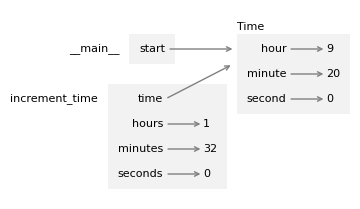

In [ ]:
from diagram import Bbox

width, height, x, y = [3.4, 1.89, 1.75, 1.5]
ax = diagram(width, height)
bbox1 = stack.draw(ax, x, y)
bbox2 = obj1.draw(ax, x+0.23, y)
bbox = Bbox.union([bbox1, bbox2])
# adjust(x, y, bbox)

Dentro da função, `time` é um alias para `start`, então quando `time` é modificado, `start` muda.

Esta função funciona, mas depois que ela é executada, ficamos com uma variável chamada `start` que se refere a um objeto que representa o tempo *final*, e não temos mais um objeto que representa o tempo inicial.
Seria melhor deixar `start` inalterado e criar um novo objeto para representar o tempo final.
Podemos fazer isso copiando `start` e modificando a cópia:

## Copiando

O módulo `copy`possui uma função chamada `copy` que pode duplicar qualquer objeto.
Podemos importá-lo assim:

In [ ]:
from copy import copy

Para ver como funciona, vamos começar com um novo objeto `Time` que representa a hora de início do filme:

In [ ]:
start = make_time(9, 20, 0)

E fazer uma cópia:

In [ ]:
end = copy(start)

Agora `start` e `end` contêm os mesmos dados?

In [ ]:
print_time(start)
print_time(end)

09:20:00
09:20:00


Mas o operador `is` confirma que eles não são o mesmo objeto:

In [ ]:
start is end

False

Vamos ver o que o operador `==` faz:

In [ ]:
start == end

False

Você pode esperar que `==` produza `True` porque os objetos contêm os mesmos dados.
Mas para classes definidas pelo programador, o comportamento padrão do operador `==` é o mesmo que o operador `is` -- ele verifica identidade, não equivalência.

## Funções puras

Podemos usar `copy` para escrever funções puras que não modificam seus parâmetros.
Por exemplo, aqui está uma função que pega um objeto `Time` e uma duração em horas, minutos e segundos.
Ela faz uma cópia do objeto original, usa `increment_time` para modificar a cópia e a devolve:

In [ ]:
def add_time(time, hours, minutes, seconds):
    total = copy(time)
    increment_time(total, hours, minutes, seconds)
    return total

Veja como a usamos:

In [ ]:
end = add_time(start, 1, 32, 0)
print_time(end)

10:52:00


O valor devolvido é um novo objeto representando o tempo final do filme.
E podemos confirmar que `start` não foi alterado:

In [ ]:
print_time(start)

09:20:00


`add_time` é uma **função pura** porque não modifica nenhum dos objetos passados ​​a ela como argumentos e seu único efeito é devolver um valor.

Qualquer coisa que possa ser feita com funções impuras também pode ser feita com funções puras.
Na verdade, algumas linguagens de programação permitem apenas funções puras.
Programas que usam funções puras podem ser menos propensos a erros, mas funções impuras às vezes são convenientes e podem ser mais eficientes.

Em geral, sugiro que você escreva funções puras sempre que for razoável e recorra a funções impuras apenas se houver uma vantagem convincente.
Essa abordagem pode ser chamada de **estilo de programação funcional**.

## Prototipar e corrigir

No exemplo anterior, `increment_time` e `add_time` parecem funcionar, mas se tentarmos outro exemplo, veremos que eles não estão totalmente corretos.

Suponha que você chegue ao cinema e descubra que o filme começa em `21:40`, não `21:20`.
Aqui está o que acontece quando calculamos o tempo de término atualizado:

In [ ]:
start = make_time(9, 40, 0)
end = add_time(start, 1, 32, 0)
print_time(end)

10:72:00


O resultado não é um tempo válido.
O problema é que `increment_time` não lida com casos em que o número de segundos ou minutos soma mais que `60`.

Aqui está uma versão melhorada que verifica se `second` excede ou é igual a `60` -- se for, ele incrementa `minute` -- então verifica se `minute` excede ou é igual a `60` -- se for, ele incrementa `hour`:

In [ ]:
def increment_time(time, hours, minutes, seconds):
    time.hour += hours
    time.minute += minutes
    time.second += seconds

    if time.second >= 60:
        time.second -= 60
        time.minute += 1

    if time.minute >= 60:
        time.minute -= 60
        time.hour += 1

Corrigir `increment_time` também corrige `add_time`, que o usa.
Então agora o exemplo anterior funciona corretamente:

In [ ]:
end = add_time(start, 1, 32, 0)
print_time(end)

11:12:00


Mas essa função ainda não está correta, porque os argumentos podem ser maiores que `60`.
Por exemplo, suponha que nos seja dado o tempo de execução como `92` minutos, em vez de `1` hora e `32` minutos.
Podemos chamar `add_time` assim:

In [ ]:
end = add_time(start, 0, 92, 0)
print_time(end)

10:72:00


O resultado não é um horário válido.
Então, vamos tentar uma abordagem diferente, usando a função `divmod`.
Faremos uma cópia de `start` e a modificaremos incrementando o atributo `minute`:

In [ ]:
end = copy(start)
end.minute = start.minute + 92
end.minute

132

Agora `minute` é `132`, que é `2` horas e `12` minutos.
Podemos usar `divmod` para dividir por `60` e devolver o número de horas inteiras e o número de minutos restantes:

In [ ]:
carry, end.minute = divmod(end.minute, 60)
carry, end.minute

(2, 12)

Agora `minuto` está correto, e podemos adicionar as horas a `hora`:

In [ ]:
end.hour += carry
print_time(end)

11:12:00


O resultado é um tempo válido.
Podemos fazer a mesma coisa com `hour` e `second`, e encapsular todo o processo em uma função:

In [ ]:
def increment_time(time, hours, minutes, seconds):
    time.hour += hours
    time.minute += minutes
    time.second += seconds

    carry, time.second = divmod(time.second, 60)
    carry, time.minute = divmod(time.minute + carry, 60)
    carry, time.hour = divmod(time.hour + carry, 60)

Com esta versão de `increment_time`, `add_time` funciona corretamente, mesmo que os argumentos excedam `60`:

In [ ]:
end = add_time(start, 0, 90, 120)
print_time(end)

11:12:00


Esta seção demonstra um plano de desenvolvimento de programa que chamo de **protótipar e corrigir**.
Começamos com um protótipo simples que funcionou corretamente para o primeiro exemplo.
Então, testamos com exemplos mais difíceis -- quando encontramos um erro, modificamos o programa para consertá-lo, como colocar um remendo em um pneu furado.

Essa abordagem pode ser eficaz, especialmente se você ainda não tem um entendimento profundo do problema.
Mas correções incrementais podem gerar código desnecessariamente complicado -- já que lida com muitos casos especiais -- e não confiável -- já que é difícil saber se você encontrou todos os erros.

## Desenvolvimento orientado pelo projeto

Um plano alternativo é o **desenvolvimento orientado pelo projeto**, que envolve mais planejamento antes da prototipagem. Em um processo orientado pelo projeto, às vezes uma visão de alto nível do problema torna a programação muito mais fácil.

Neste caso, a visão é que podemos pensar em um objeto `Time` como um número de três dígitos na base 60 -- também conhecido como sexagesimal.
O atributo `second` é a "coluna de uns", o atributo `minute` é a "coluna de sessenta", e o atributo `hour` é a "coluna de trinta e seis centenas".
Quando escrevemos `increment_time`, estávamos efetivamente fazendo adição na base 60, e é por isso que tivemos que transportar de uma coluna para a próxima.

Esta observação sugere outra abordagem para todo o problema -- podemos converter objetos `Time` em inteiros e aproveitar o fato de que o Python sabe como fazer aritmética de inteiros.

Aqui está uma função que converte de um `Time` para um inteiro:

In [ ]:
def time_to_int(time):
    minutes = time.hour * 60 + time.minute
    seconds = minutes * 60 + time.second
    return seconds

O resultado é o número de segundos desde o início do dia.
Por exemplo, `01:01:01` é `1` hora, `1` minuto e `1` segundo desde o início do dia, que é a soma de `3600` segundos, `60` segundos e `1` segundo:

In [ ]:
time = make_time(1, 1, 1)
print_time(time)
time_to_int(time)

01:01:01


3661

E aqui está uma função que vai no outro sentido -- convertendo um inteiro em um objeto `Time` -- usando a função `divmod`:

In [ ]:
def int_to_time(seconds):
    minute, second = divmod(seconds, 60)
    hour, minute = divmod(minute, 60)
    return make_time(hour, minute, second)

Podemos testar isso convertendo o exemplo anterior novamente para um `Time`:

In [ ]:
time = int_to_time(3661)
print_time(time)

01:01:01


Usando essas funções, podemos escrever uma versão mais concisa de `add_time`:

In [ ]:
def add_time(time, hours, minutes, seconds):
    duration = make_time(hours, minutes, seconds)
    seconds = time_to_int(time) + time_to_int(duration)
    return int_to_time(seconds)

A primeira linha converte os argumentos para um objeto `Time` chamado `duration`.
A segunda linha converte `time` e `duration` para segundos e os soma.
A terceira linha converte a soma para um objeto `Time` e o devolve.

Veja como funciona:

In [ ]:
start = make_time(9, 40, 0)
end = add_time(start, 1, 32, 0)
print_time(end)

11:12:00


De certa forma, converter da base 60 para a base 10 e vice-versa é mais difícil do que apenas lidar com tempos. A conversão de base é mais abstrata; nossa intuição para lidar com valores de tempo é melhor.

Mas se tivermos a percepção de tratar tempos como números de base 60 -- e investirmos o esforço para escrever as funções de conversão `time_to_int` e `int_to_time` -- obtemos um programa mais curto, mais fácil de ler e depurar, e mais confiável.

Também é mais fácil adicionar recursos mais tarde. Por exemplo, imagine subtrair dois objetos `Time` para encontrar a duração entre eles.
A abordagem ingênua é implementar a subtração com empréstimo.
Usar as funções de conversão é mais fácil e tem mais probabilidade de estar correto.

Ironicamente, às vezes tornar um problema mais difícil -- ou mais geral -- o torna mais fácil, porque há menos casos especiais e menos oportunidades de erro.

## Depuração

O Python fornece várias funções internas que são úteis para testar e depurar programas que trabalham com objetos.
Por exemplo, se você não tem certeza de qual é o tipo de um objeto, você pode perguntar:

In [ ]:
type(start)

__main__.Time

Você também pode usar `isinstance` para verificar se um objeto é uma instância de uma certa classe:

In [ ]:
isinstance(end, Time)

True

Se você não tiver certeza se um objeto tem um certo atributo, você
pode usar a função interna `hasattr`:

In [ ]:
hasattr(start, 'hour')

True

Para obter todos os atributos e seus valores em um dicionário, você pode usar `vars`:

In [ ]:
vars(start)

{'hour': 9, 'minute': 40, 'second': 0}

O módulo `structshape`, que vimos no [Capítulo 11](https://colab.research.google.com/github/rodrigocarlson/PensePython3ed/blob/main/capitulos/chap11.ipynb), também funciona com tipos definidos pelo programador.

In [ ]:
download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/structshape.py');

In [ ]:
from structshape import structshape

t = start, end
structshape(t)

'tuple of 2 Time'

## Glossário

**programação orientada a objetos** (*object-oriented programming*)**:**
Um estilo de programação que usa objetos para organizar código e dados.

**classe** (*class*)**:**
Um tipo definido pelo programador. Uma definição de classe cria um novo objeto de classe.

**objeto classe** (*class object*)**:**
Um objeto que representa uma classe -- é o resultado de uma definição de classe.

**instanciação** (*instantiation*)**:**
O processo de criação de um objeto que pertence a uma classe.

**instância** (*instance*)**:**
Um objeto que pertence a uma classe.

**atributo** (*attribute*)**:**
Uma variável associada a um objeto, também chamada de variável de instância.

**diagrama de objetos** (*object diagram*)**:**
Uma representação gráfica de um objeto, seus atributos e seus valores.

**especificador de formato** (*format specifier*)**:**
Em uma *f-string*, um especificador de formato determina como um valor é convertido em uma *string*.

**função pura** (*pure function*)**:**
Uma função que não modifica seus parâmetros ou tem qualquer efeito além de devolver um valor.

**estilo de programação funcional** (*functional programming style*)**:**
Uma maneira de programar que usa funções puras sempre que possível.

**prototipar e corrigir** (*prototype and patch*)**:**
Uma maneira de desenvolver programas começando com um rascunho e gradualmente adicionando recursos e corrigindo bugs.

**desenvolvimento orientado por projeto** (*design-first development*)**:**
Uma maneira de desenvolver programas com planejamento mais cuidadoso do que prototipar e corrigir.

## Exercícios

In [ ]:
# Esta célula diz ao Jupyter para fornecer informações detalhadas de depuração
# quando ocorre um erro de tempo de execução. Execute-a antes de trabalhar nos
# exercícios.

%xmode Verbose

Exception reporting mode: Verbose


### Pergunte a um assistente virtual

Há muito vocabulário novo neste capítulo.
Uma conversa com um assistente virtual pode ajudar a solidificar sua compreensão.
Considere perguntar:

* "Qual é a diferença entre uma classe e um tipo?" ("*What is the difference between a class and a type?*")

* "Qual é a diferença entre um objeto e uma instância?" ("*What is the difference between an object and an instance?*")

* "Qual é a diferença entre uma variável e um atributo?" ("*What is the difference between a variable and an attribute?*")

* "Quais são os prós e contras de funções puras em comparação com funções impuras?" ("*What are the pros and cons of pure functions compared to impure functions?*")

Como estamos apenas começando com a programação orientada a objetos, o código neste capítulo não é idiomático -- não é o tipo de código que programadores experientes escrevem.
Se você pedir ajuda a um assistente virtual com os exercícios, provavelmente verá recursos que ainda não abordamos.
Em particular, é provável que você veja um método chamado `__init__` usado para inicializar os atributos de uma instância.

Se esses recursos fizerem sentido para você, vá em frente e use-os.
Mas se não, seja paciente -- chegaremos lá em breve.
Enquanto isso, veja se você consegue resolver os exercícios a seguir usando apenas os recursos que cobrimos até agora.

Além disso, neste capítulo, vimos um exemplo de um especificador de formato. Para mais informações, pergunte "Quais especificadores de formato podem ser usados ​​em uma *f-string* do Python?" ("*What format specifiers can be used in a Python f-string?*")

### Exercício

Escreva uma função chamada `subtract_time` que recebe dois objetos `Time` e devolve o intervalo entre eles em segundos -- assumindo que são horários no mesmo dia.

Aqui está um esboço da função para você começar:

In [ ]:
def subtract_time(t1, t2):
    """Calcula a diferença entre dois horários em segundos.

    >>> subtract_time(make_time(3, 2, 1), make_time(3, 2, 0))
    1
    >>> subtract_time(make_time(3, 2, 1), make_time(3, 0, 0))
    121
    >>> subtract_time(make_time(11, 12, 0), make_time(9, 40, 0))
    5520
    """
    return None

In [ ]:
# Solução

def subtract_time(t1, t2):
    """Calcula a diferença entre dois horários em segundos.

    >>> subtract_time(make_time(3, 2, 1), make_time(3, 2, 0))
    1
    >>> subtract_time(make_time(3, 2, 1), make_time(3, 0, 0))
    121
    >>> subtract_time(make_time(11, 12, 0), make_time(9, 40, 0))
    5520
    """
    return time_to_int(t1) - time_to_int(t2)

Você pode usar `doctest` para testar sua função:

In [ ]:
from doctest import run_docstring_examples

def run_doctests(func):
    run_docstring_examples(func, globals(), name=func.__name__)

run_doctests(subtract_time)

### Exercício

Escreva uma função chamada `is_after` que recebe dois objetos `Time` e devolve `True` se o primeiro horário for mais tarde no dia do que o segundo, e `False` caso contrário.

Aqui está um esboço da função para você começar.:

In [ ]:
def is_after(t1, t2):
    """Verifica se `t1` é posterior a `t2`.

    >>> is_after(make_time(3, 2, 1), make_time(3, 2, 0))
    True
    >>> is_after(make_time(3, 2, 1), make_time(3, 2, 1))
    False
    >>> is_after(make_time(11, 12, 0), make_time(9, 40, 0))
    True
    """
    return None

In [ ]:
# Solução

def is_after(t1, t2):
    """Verifica se `t1` é posterior a `t2`.

    >>> is_after(make_time(3, 2, 1), make_time(3, 2, 0))
    True
    >>> is_after(make_time(3, 2, 1), make_time(3, 2, 1))
    False
    >>> is_after(make_time(11, 12, 0), make_time(9, 40, 0))
    True
    """
    return time_to_int(t1) > time_to_int(t2)

Você pode usar `doctest` para testar sua função:

In [ ]:
run_doctests(is_after)

### Exercício

Aqui está uma definição para uma classe `Date` que representa uma data -- ou seja, um ano, mês e dia do mês:

In [ ]:
class Date:
    """Representa um ano, mês e dia"""

1. Escreva uma função chamada `make_date` que recebe `year`, `month` e `day` como parâmetros, cria um objeto `Date`, atribui os parâmetros aos atributos e devolve o resultado do novo objeto. Crie um objeto que represente 22 de junho de 1933.

2. Escreva uma função chamada `print_date` que recebe um objeto `Date`, usa uma *f-string* para formatar os atributos e exibe o resultado. Se você testá-lo com o `Date` que criou, o resultado deve ser `1933-06-22`.

3. Escreva uma função chamada `is_after` que recebe dois objetos `Date` como parâmetros e devolve `True` se o primeiro vier depois do segundo. Crie um segundo objeto que represente 17 de setembro de 1933 e verifique se ele vem depois do primeiro objeto.

Dica: Você pode achar útil escrever uma função chamada `date_to_tuple` que pega um objeto `Date` e devolve uma tupla que contém seus atributos na ordem ano, mês e dia.

Você pode usar este esboço de função para começar:

In [ ]:
def make_date(year, month, day):
    return None

In [ ]:
# Solução

def make_date(year, month, day):
    date = Date()
    date.year = year
    date.month = month
    date.day = day
    return date

Você pode usar esses exemplos para testar `make_date`:

In [ ]:
birthday1 = make_date(1933, 6, 22)

In [ ]:
birthday2 = make_date(1933, 9, 17)

Você pode usar este esboço de função para começar:

In [ ]:
def print_date(date):
    print('')

In [ ]:
# Solução

def print_date(date):
    s = f'{date.year}-{date.month:02d}-{date.day:02d}'
    print(s)

Você pode usar este exemplo para testar `print_date`:

In [ ]:
print_date(birthday1)

1933-06-22


Você pode usar este esboço de função para começar:

In [ ]:
def is_after(date1, date2):
    return None

In [ ]:
# Solução

def date_to_tuple(date):
    return date.year, date.month, date.day

In [ ]:
# Solução

def is_after(date1, date2):
    t1 = date_to_tuple(date1)
    t2 = date_to_tuple(date2)
    return t1 > t2

Você pode usar esses exemplos para testar `is_after`:

In [ ]:
is_after(birthday1, birthday2)  # deve ser False

False

In [ ]:
is_after(birthday2, birthday1)  # deve ser True

True

[Pense Python: 3ª Edição](https://rodrigocarlson.github.io/PensePython3ed/)

Copyright 2024 [Allen B. Downey](https://allendowney.com/) (versão original)

Copyright 2025 [Rodrigo Castelan Carlson](https://rodrigocarlson.paginas.ufsc.br/) (desta versão)

Foram preservadas as mesmas licenças da versão original.

Licença dos códigos: [MIT License](https://mit-license.org/)

Licença dos textos: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)